Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vinicius Juliao Ramos"
COLLABORATORS = ""

---

# Lista 04 - Teste de Hipótese

In [2]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Fixa a semente geradora de numeros aleatorios para gerar os mesmos resultados a cada execucao
np.random.seed(42)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [4]:
def q1a():
    # YOUR CODE HERE
#     raise NotImplementedError()
    return[False, True, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance (TVD):

$$ \mathit{TVD}(p, q) = \frac{1}{2}|p - q| = \frac{1}{2}\sum_{i=1}^n |p_i - q_i| $$    
onde $p$ e $q$ são os vetores de proporções

In [5]:
def tvd(p, q):
    # YOUR CODE HERE
#     raise NotImplementedError()
    return np.sum(np.abs(p-q))/2

In [6]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [7]:
def q1c():
    # YOUR CODE HERE
#     raise NotImplementedError()
    populacao = np.array(2000., 8000., 2500.)
    amostra = np.array(100, 600, 300)
    
    return tdv(populacao/np.sum(populacao), amostra/np.sum(amostra))
    

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

Por exemplo, o vetor [0, 0, 1, 1, 1, 2] representa uma população de tamanho 6, com dois elementos na classe 0, três elementos na classe 1 e um elemento na classe 2. As proporções são 2/6, 3/6 e 1/6, respectivamente.

In [8]:
def calcula_proporcao(amostra, valor):
    return sum(1 for x in amostra if x == valor) / len(amostra)

exatas = np.repeat(0, 2000)
humanas = np.repeat(1, 8000)
biologicas = np.repeat(2, 2500)
populacao = np.concatenate((exatas, humanas, biologicas), axis=None)

def gera_amostra(tamanho_amostra):
    # YOUR CODE HERE
#     raise NotImplementedError()
    np.random.shuffle(populacao)
#     data = np.random.randint(0, 3, tamanho_amostra)
    proporcao_amostra = np.zeros(3)
    proporcao_amostra[0] = calcula_proporcao(populacao[:tamanho_amostra], 0)
    proporcao_amostra[1] = calcula_proporcao(populacao[:tamanho_amostra], 1)
    proporcao_amostra[2] = calcula_proporcao(populacao[:tamanho_amostra], 2)
    return proporcao_amostra


E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

[0.16 0.64 0.2 ]


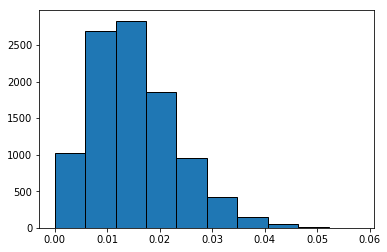

In [9]:
# YOUR CODE HERE
# raise NotImplementedError()
samples = np.zeros(10000)

proporcao = np.zeros(3)
proporcao[0] = calcula_proporcao(populacao, 0)
proporcao[1] = calcula_proporcao(populacao, 1)
proporcao[2] = calcula_proporcao(populacao, 2)
print(proporcao)

for i in range(10000):
    sample = gera_amostra(1000)
    samples[i] = tvd(sample, proporcao)
plt.hist(samples, edgecolor='k')
plt.show()

F) Escreva uma função q1f(x) que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de x% de confiança.

__Dica__: Utilize o método baseado em boostrap, ou seja, calcule o TVD para um número grande de amostras da população, como foi feito no passo anterior. Em seguida, encontre o percentil dos TVDs calculados que corresponde ao nível de confiança de 90%.

Retorne apenas o lado direito do intervalo de confiança para o TVD.


In [10]:
def q1f(x):
    # YOUR CODE HERE
#     raise NotImplementedError()
    samples_ = np.zeros(10000)
    for i in range(10000):
        sample = gera_amostra(1000)
        samples_[i] = tvd(sample, proporcao)
        
    init = (100-x)/2
    return np.percentile(samples_, x+init)

In [11]:
from numpy.testing import *
assert_almost_equal( q1f(95), 0.034, 3 )
assert_almost_equal( q1f(90), 0.031, 3 )
assert_almost_equal( q1f(80), 0.026, 3 )

# Exercício 02:

Usando os dados do arquivo ```enem2015.csv```, vamos realizar um teste por permutação.

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


A) Implemente uma função que retorne a diferença entre a média das notas das escolas públicas federais e a média das notas de  escolas privadas. Exemplo:

```python
def q2a(df):
    media_federal = 631.0
    media_particular = 620.0
    return 11.0
```

In [14]:
def q2a(df):
    # YOUR CODE HERE
#     raise NotImplementedError()
    federal = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal']['NOTA_MEDIA_ESCOLA'].mean()
    privada = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Privada']['NOTA_MEDIA_ESCOLA'].mean()
    return federal - privada

B) Realize permutações com os rótulos (Federal / Privada), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias notas, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

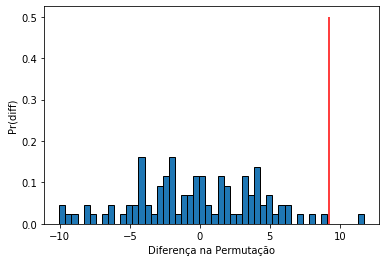

In [15]:
from IPython.display import Image
Image('100permutacoes.png')

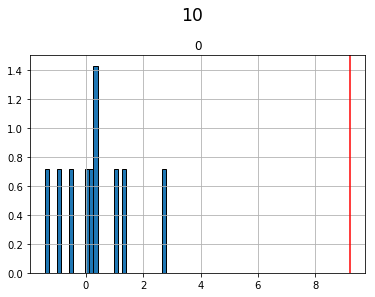

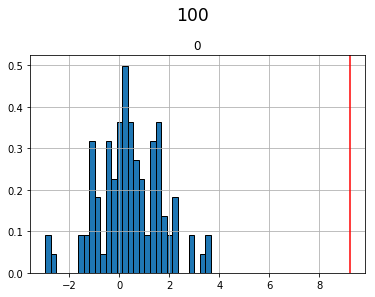

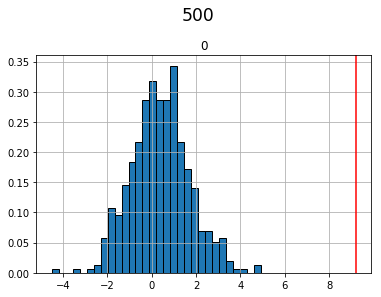

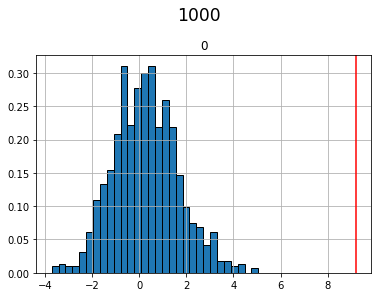

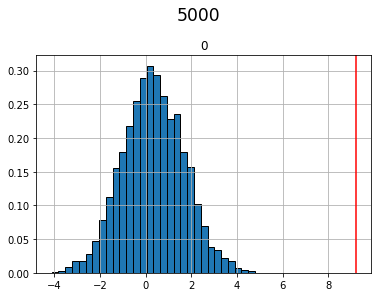

In [16]:
# YOUR CODE HERE
# raise NotImplementedError()

permutacoes = np.array([10, 100,500, 1000, 5000])

df_federal = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal']
df_privada = df[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Privada']
federal_media_inicial = df_federal['NOTA_MEDIA_ESCOLA'].mean()
privada_media_inicial = df_privada['NOTA_MEDIA_ESCOLA'].mean()

initial_difference = float("%.2f" % (federal_media_inicial-privada_media_inicial))

for n in permutacoes:
    dif = []
    '''for i in range(n):
        df[df['DEPENDENCIA_ADMINISTRATIVA']=='Federal'].iloc[i]['DEPENDENCIA_ADMINISTRATIVA'] = 'Privada'
        df[df['DEPENDENCIA_ADMINISTRATIVA']=='Privada'].iloc[i]['DEPENDENCIA_ADMINISTRATIVA'] = 'Federal'
    '''
    for j in range(n):
        difference = (df_federal.sample().iloc[0]['NOTA_MEDIA_ESCOLA'] - df_privada.sample().iloc[0]['NOTA_MEDIA_ESCOLA'])/30
        dif.append(difference)
    dif_df = pd.DataFrame(dif)
    dif_df.hist(bins=30, density=True, edgecolor='k')
    plt.suptitle(n, x=0.5, y=1.05, ha='center', fontsize='xx-large')
    plt.axvline(initial_difference, color='red')

B) Escreva abaixo o que você observou com os gráficos.

O observado é que quanto maior a quantidadde de permutações realizadas, mais pode-se aproximar o comportamento do grafico de uma normal. Pode-se aida observar o comportamento  do dataset que é bem diferente do comportamento aleatório, podendo-se assumir como hipótese nula "o comportamento das notas entre alunos de escola publica federal e ecola particular é de crivo aleatório". Mostrou-se pelo teste de permutação (que provoca um cenário aleatório) que as notas não possuem o mesmo comportamento nulo pois observa-se que o valor marcado de vermelho, é o comportamento real dos dados e está muito distante do intervalo de confiança gerado através do teste de permutação.